<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl, seaborn as sns
import pcmdpy as ppy
%matplotlib inline

GPU acceleration not available, sorry
No module named 'pycuda'


In [2]:
sns.set_context('poster')

In [3]:
titles = {0:r'$\tau=1$ Gyr', 1:r'$\tau=2$ Gyr', 2:'Const SFR', 3:'Rising'}

In [4]:
res = {n:ppy.utils.ResultsPlotter('results/mockgrid_{:d}.csv'.format(n), run_name=titles[n]) for n in range(4)}

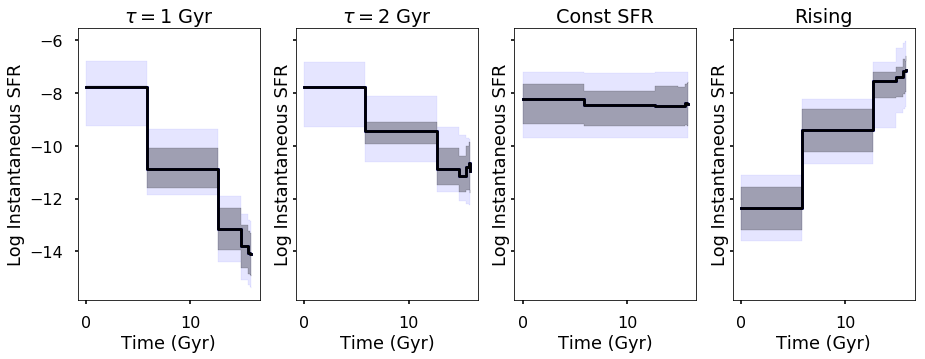

In [5]:
fig, axes = plt.subplots(ncols=4, sharey=True, figsize=(15, 5))
for i in range(4):
    res[i].plot_sfh(axis=axes[i])

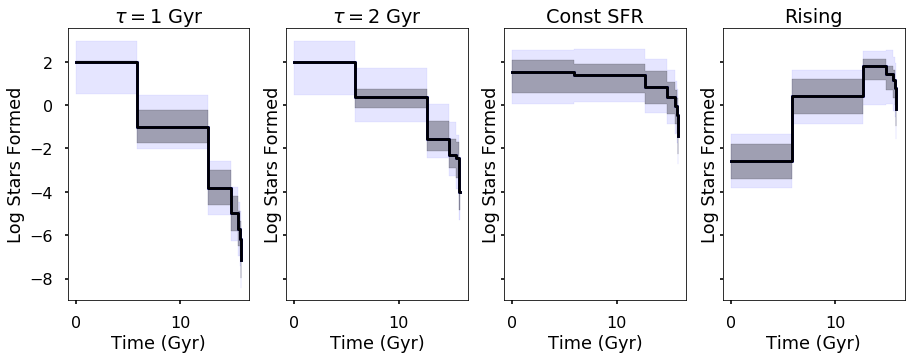

In [6]:
fig, axes = plt.subplots(ncols=4, sharey=True, figsize=(15, 5))
for i in range(4):
    res[i].plot_sfh(axis=axes[i], norm=False)

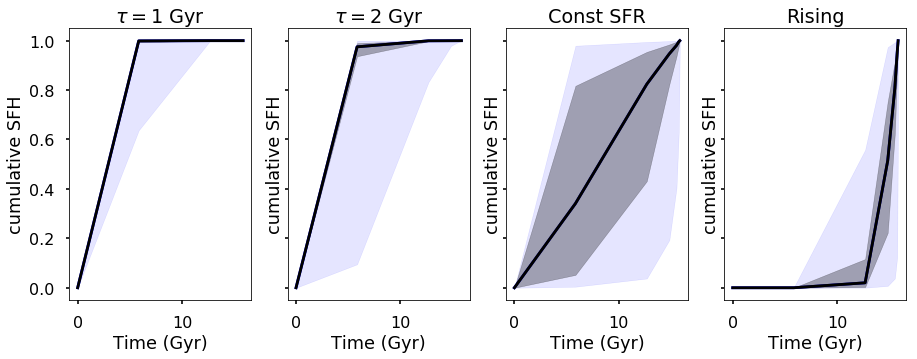

In [7]:
fig, axes = plt.subplots(ncols=4, sharey=True, figsize=(15, 5))
for i in range(4):
    res[i].plot_cum_sfh(axis=axes[i])

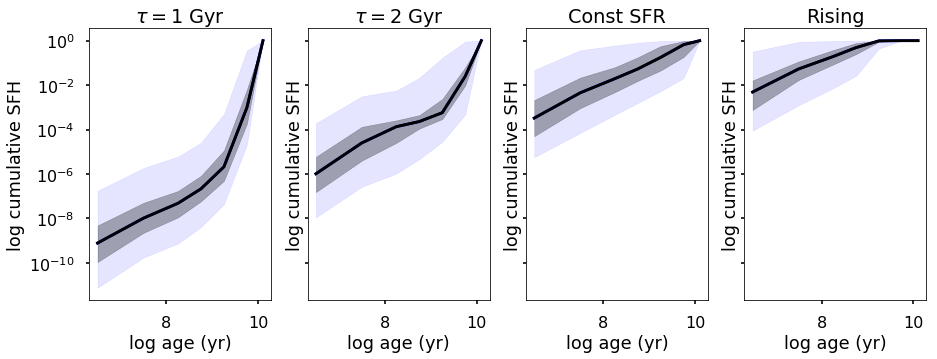

In [8]:
fig, axes = plt.subplots(ncols=4, sharey=True, figsize=(15, 5))
for i in range(4):
    res[i].plot_cum_sfh_log(axis=axes[i])

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=12, figsize=(15, 25))


-6.926471027185865 1.9987461876984423
-3.7869874220238073 1.9761891155104796
-1.2457300875668569 1.6349388643670486
-2.3437643368521726 1.5579583628521336


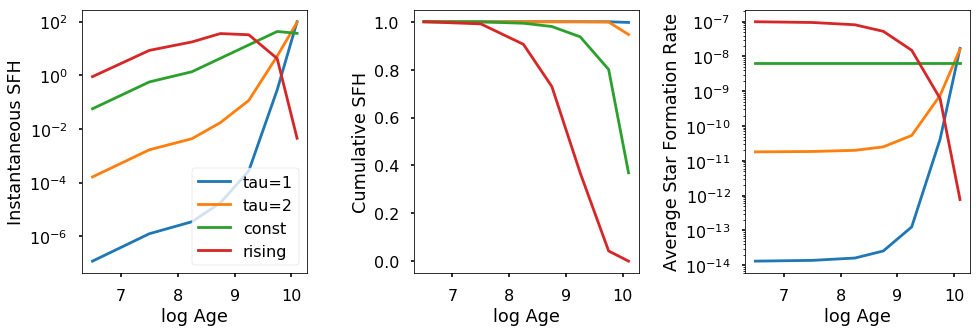

In [8]:
logNpix = 2.
d_lower = 3.5
d_upper = 3.0
step = -1
a1 = ppy.agemodels.TauModel(np.array([logNpix, 1.]), iso_step=step)
a1.lower = ppy.agemodels.TauModel(np.array([logNpix-d_lower, 1.]), iso_step=step).SFH
a1.upper = ppy.agemodels.TauModel(np.array([logNpix+d_upper, 1.]), iso_step=step).SFH
a2 = ppy.agemodels.TauModel(np.array([logNpix, 2.]), iso_step=step)
a2.lower = ppy.agemodels.TauModel(np.array([logNpix-d_lower, 2.]), iso_step=step).SFH
a2.upper = ppy.agemodels.TauModel(np.array([logNpix+d_upper, 2.]), iso_step=step).SFH
a3 = ppy.agemodels.ConstantSFR(np.array([logNpix]), iso_step=step)
a3.lower = ppy.agemodels.ConstantSFR(np.array([logNpix-d_lower]), iso_step=step).SFH
a3.upper = ppy.agemodels.ConstantSFR(np.array([logNpix+d_upper]), iso_step=step).SFH
# a4 = ppy.agemodels.RisingTau(np.array([logNpix, 100.]), iso_step=step)
a4 = ppy.agemodels.TauModel(np.array([logNpix, -1.]), iso_step=step)
a4.lower = ppy.agemodels.TauModel(np.array([logNpix-d_lower, -1.]), iso_step=step).SFH
a4.upper = ppy.agemodels.TauModel(np.array([logNpix+d_upper, -1.]), iso_step=step).SFH

fig, axes = plt.subplots(ncols=3, figsize=(14, 5))
for t, a in zip(['tau=1', 'tau=2', 'const', 'rising'],[a1, a2, a3, a4]):
#     axes[0].fill_between(a.ages, y1=a.lower, y2=a.upper, alpha=0.25)
    axes[0].plot(a.ages, a.SFH, ls='-', label=t)
    print(min(np.log10(a.SFH)), max(np.log10(a.SFH)))
    blah = a.SFH / a.Npix
    inv_cum_sum = np.cumsum(blah[::-1])[::-1]
#     axes[1].plot(a.ages, a.get_cum_sfh(), ls='-', label=t)
    axes[1].plot(a.ages, inv_cum_sum, ls='-', label=t)
    delta_t = np.diff(10.**a.default_edges)
    ave_sfh = a.SFH / delta_t
    axes[2].plot(a.ages, ave_sfh, ls='-', label=t)
axes[0].set_yscale('log')#, axes[1].set_yscale('log')
axes[2].set_yscale('log')
axes[0].set_ylabel('Instantaneous SFH'), axes[1].set_ylabel('Cumulative SFH'), axes[2].set_ylabel('Average Star Formation Rate')
axes[0].set_xlabel('log Age'), axes[1].set_xlabel('log Age'), axes[2].set_xlabel('log Age')
axes[0].legend(loc=0)
plt.tight_layout()